In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

schedule=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx')

# convert
def convert(inputTime):
    try:
        hh,mm,ss=inputTime.split(':')
        ans=int(hh)+int(mm)/60+int(ss)/3600
    except:
        ans=np.nan
    return ans

# Set rooms to focus on to be those in the capacity file.
roomSet=set(capacities.Room)      # Create a set which contains the rooms in the capacities file.
ans={}                   # Initialize a dictionary to store the result we want

df=schedule
df.head()

,Course,Course Prefix,Course Suffix,Department,First Begin Time,First Days,First End Time,First Instructor,First Instructor UID,First Room,...,Second Begin Time,Second Days,Second End Time,Second Instructor,Second Instructor UID,Second Room,Section,Session,Term,Title
0,ACCT-370,ACCT,370,ACCT,10:00:00,F,11:50:00,"Hopkins, Merle, W",3.783354e+09,SLH200,...,NaN,NaN,NaN,NaN,NaN,NaN,14029,1,20153,External Financial Reporting Issues
1,ACCT-370,ACCT,370,ACCT,08:00:00,MW,09:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,NaN,14025,1,20153,External Financial Reporting Issues
2,ACCT-370,ACCT,370,ACCT,10:00:00,MW,11:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,NaN,14026,1,20153,External Financial Reporting Issues
3,ACCT-370,ACCT,370,ACCT,12:00:00,MW,13:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,NaN,14027,1,20153,External Financial Reporting Issues
4,ACCT-371,ACCT,371,ACCT,10:00:00,F,11:50:00,NaN,NaN,SLH200,...,NaN,NaN,NaN,NaN,NaN,NaN,14044,1,20153,Introduction to Accounting Systems


In [106]:
# Iterate through the rows of the data frame above. The variable "row" will go through the rows of the dataframe. "index" will go through the indices (see left above)
for index,row in df.iterrows():   
    term=row['Term']       # Obtain the corresponding column of each row
    room=row['First Room']
    days=row['First Days'] 
    beg=convert(str(row['First Begin Time']))   # Convert the begin time strings into decimal numbers using challenge 1
    end=convert(str(row['First End Time']))     # Convert the begin time strings into decimal numbers using challenge 1
    course=row['Course']
    section=row['Section']
    reg=row['Reg Count']
    # Skip rows in which beg and end are np.nan (not a number), and in which the room is not in the capacity file
    if np.isnan(beg) or np.isnan(end) or room not in roomSet:  
        continue     # Command to skip this iteration of the loop
    for day in 'MTWHF':   # Iterate through the sequence ['M','T','W','H','F']
        if day in days: 
            key=(term,room,day,course,section)  # The key of the dictionary to set
            ans[key]=(beg,end,room,reg)   
ans

{(20153, 'ACC303', 'M', 'ACCT-370', 14025): (8.0,
  9.833333333333334,
  'ACC303',
  24),
 (20153, 'ACC303', 'W', 'ACCT-370', 14025): (8.0,
  9.833333333333334,
  'ACC303',
  24),
 (20153, 'ACC303', 'M', 'ACCT-370', 14026): (10.0,
  11.833333333333334,
  'ACC303',
  40),
 (20153, 'ACC303', 'W', 'ACCT-370', 14026): (10.0,
  11.833333333333334,
  'ACC303',
  40),
 (20153, 'ACC303', 'M', 'ACCT-370', 14027): (12.0,
  13.833333333333334,
  'ACC303',
  42),
 (20153, 'ACC303', 'W', 'ACCT-370', 14027): (12.0,
  13.833333333333334,
  'ACC303',
  42),
 (20153, 'ACC303', 'T', 'ACCT-371', 14040): (8.0,
  9.833333333333334,
  'ACC303',
  29),
 (20153, 'ACC303', 'H', 'ACCT-371', 14040): (8.0,
  9.833333333333334,
  'ACC303',
  29),
 (20153, 'ACC303', 'T', 'ACCT-371', 14042): (12.0,
  13.833333333333334,
  'ACC303',
  40),
 (20153, 'ACC303', 'H', 'ACCT-371', 14042): (12.0,
  13.833333333333334,
  'ACC303',
  40),
 (20153, 'ACC303', 'T', 'ACCT-371', 14041): (10.0,
  11.833333333333334,
  'ACC303',
  4

In [108]:
dayStart=8
dayEnd=22
usageRate=[]
for key in ans:
    start=float(ans[key][0])
    end=float(ans[key][1])
    if end<dayStart:
            continue
    if start>dayEnd:
            break
    usage=max(0,min(dayEnd,end)-max(dayStart,start))/(dayEnd-dayStart)
    usageRate.append(usage)
    
fillRate=[]
for key in ans:
    room=ans[key][2]
    reg=ans[key][3]
    index=[i for i, j in enumerate(capacities.Room) if j == room][0]
    fill=reg/capacities.iat[index,1]
    fillRate.append(fill)
    


In [132]:
combined={}
for i in range(len(ans)):
    key=list(ans.keys())[i]
    combined[key]=usageRate[i]*fillRate[i]
combined

{(20153, 'ACC303', 'M', 'ACCT-370', 14025): 0.06832298136645965,
 (20153, 'ACC303', 'W', 'ACCT-370', 14025): 0.06832298136645965,
 (20153, 'ACC303', 'M', 'ACCT-370', 14026): 0.11387163561076608,
 (20153, 'ACC303', 'W', 'ACCT-370', 14026): 0.11387163561076608,
 (20153, 'ACC303', 'M', 'ACCT-370', 14027): 0.11956521739130437,
 (20153, 'ACC303', 'W', 'ACCT-370', 14027): 0.11956521739130437,
 (20153, 'ACC303', 'T', 'ACCT-371', 14040): 0.0825569358178054,
 (20153, 'ACC303', 'H', 'ACCT-371', 14040): 0.0825569358178054,
 (20153, 'ACC303', 'T', 'ACCT-371', 14042): 0.11387163561076608,
 (20153, 'ACC303', 'H', 'ACCT-371', 14042): 0.11387163561076608,
 (20153, 'ACC303', 'T', 'ACCT-371', 14041): 0.11671842650103523,
 (20153, 'ACC303', 'H', 'ACCT-371', 14041): 0.11671842650103523,
 (20153, 'HOH EDI', 'F', 'ACCT-372', 14053): 0.07010090281465747,
 (20153, 'ACC310', 'T', 'ACCT-372', 14050): 0.12125220458553795,
 (20153, 'ACC310', 'H', 'ACCT-372', 14050): 0.12125220458553795,
 (20153, 'ACC310', 'T', 'A

In [133]:
finalans={}
    # Start with empty lists in all classrooms
terms=[20153,20161,20162,20163,20171,20172]
for term in terms:
    for room in roomSet:
         for day in 'MTWHF':
             finalans[term,room,day]=[]

for key in finalans:
    utilization=0
    currentKey=key
    for key in combined:
        if key[0:3] == currentKey:
            utilization+=combined[key]
    finalans[currentKey]=utilization

finalans

{(20153, 'ACC312', 'M'): 0.07083333333333335,
 (20153, 'ACC312', 'T'): 0.2214285714285714,
 (20153, 'ACC312', 'W'): 0.14047619047619042,
 (20153, 'ACC312', 'H'): 0.2214285714285714,
 (20153, 'ACC312', 'F'): 0.07083333333333335,
 (20153, 'JFF LL105', 'M'): 0,
 (20153, 'JFF LL105', 'T'): 0,
 (20153, 'JFF LL105', 'W'): 0,
 (20153, 'JFF LL105', 'H'): 0,
 (20153, 'JFF LL105', 'F'): 0,
 (20153, 'ACC205', 'M'): 0.6028439153439153,
 (20153, 'ACC205', 'T'): 0.8002645502645503,
 (20153, 'ACC205', 'W'): 0.6861772486772486,
 (20153, 'ACC205', 'H'): 0.7711640211640213,
 (20153, 'ACC205', 'F'): 0.21825396825396828,
 (20153, 'JFF233', 'M'): 0,
 (20153, 'JFF233', 'T'): 0,
 (20153, 'JFF233', 'W'): 0,
 (20153, 'JFF233', 'H'): 0,
 (20153, 'JFF233', 'F'): 0,
 (20153, 'JKP210', 'M'): 1.5387667887667884,
 (20153, 'JKP210', 'T'): 0.5280830280830279,
 (20153, 'JKP210', 'W'): 2.141636141636141,
 (20153, 'JKP210', 'H'): 0.5170940170940169,
 (20153, 'JKP210', 'F'): 0.32509157509157494,
 (20153, 'JFF416', 'M'): 0

In [137]:
lines=[]
for term,room,day in finalans:
    # Each row of the output data has columns being term, room, day, utilization
    lines.append([term,room,day,finalans[term,room,day]])

output=pd.DataFrame(lines,columns=['Term','Room','Day','Utilization'])

In [139]:
# Output to a file
output.to_csv('RoomUsage.csv')
output

,Term,Room,Day,Utilization
0,20153,ACC312,M,0.070833
1,20153,ACC312,T,0.221429
2,20153,ACC312,W,0.140476
3,20153,ACC312,H,0.221429
4,20153,ACC312,F,0.070833
5,20153,JFF LL105,M,0.000000
6,20153,JFF LL105,T,0.000000
7,20153,JFF LL105,W,0.000000
8,20153,JFF LL105,H,0.000000
9,20153,JFF LL105,F,0.000000


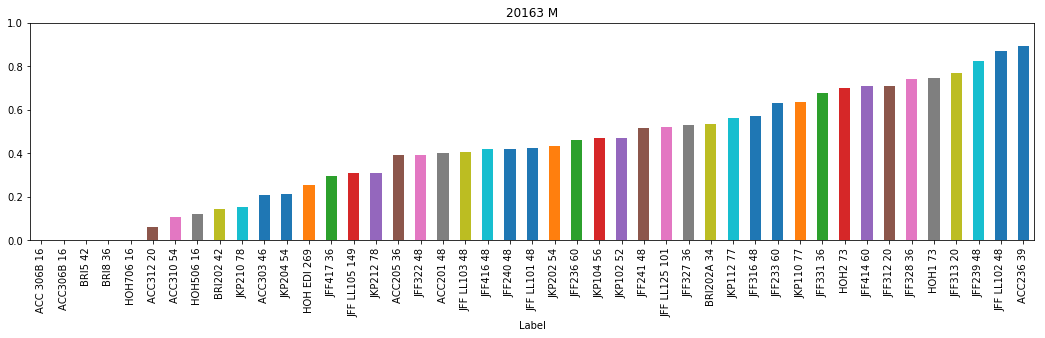

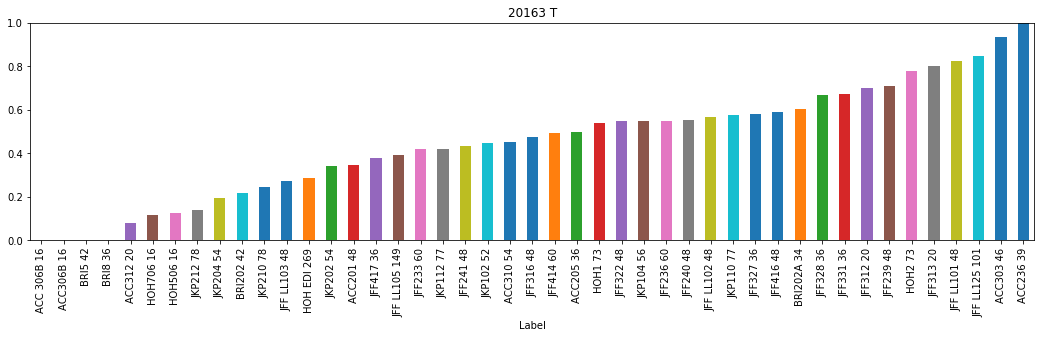

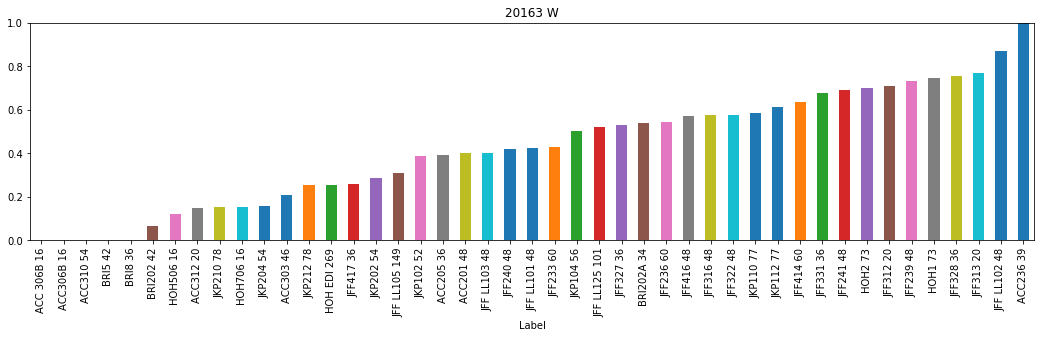

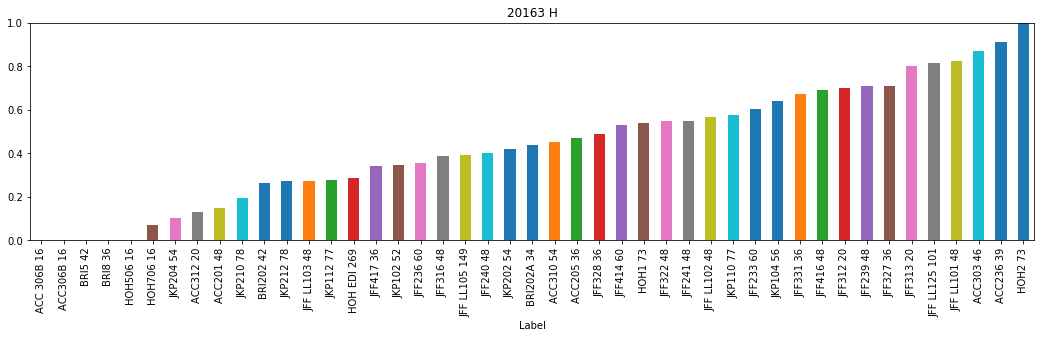

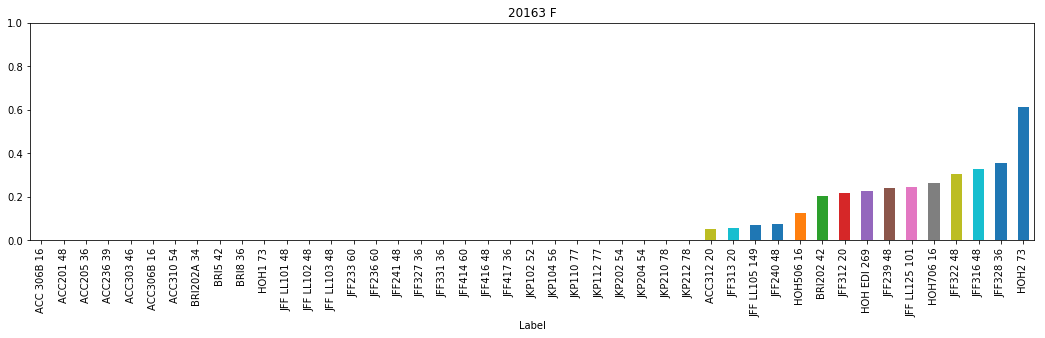

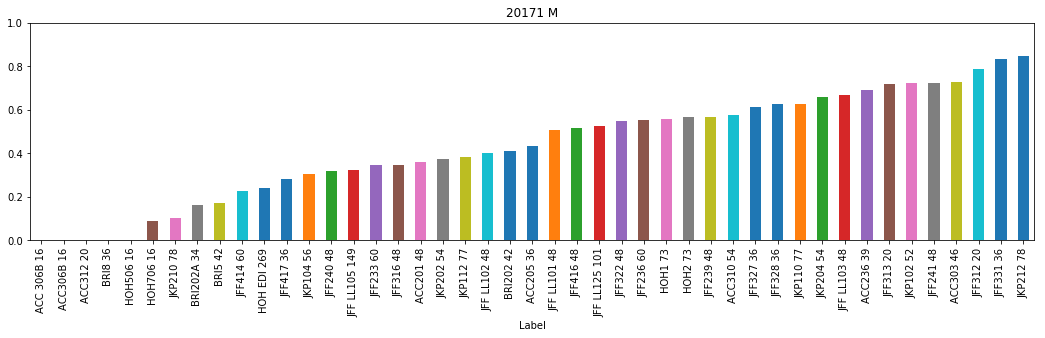

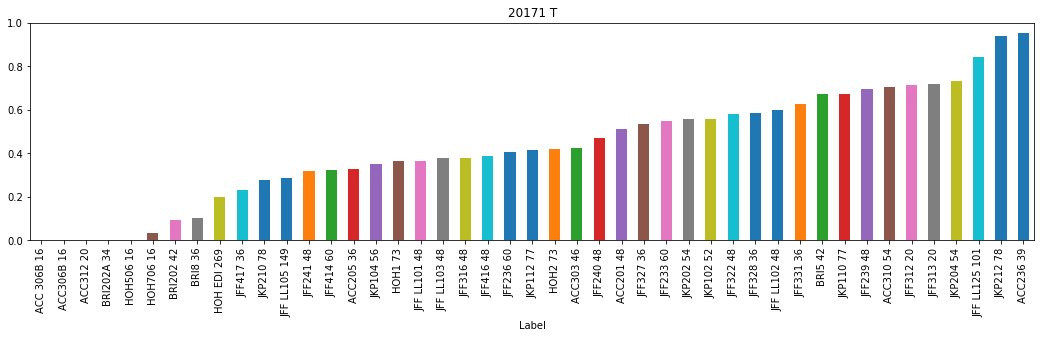

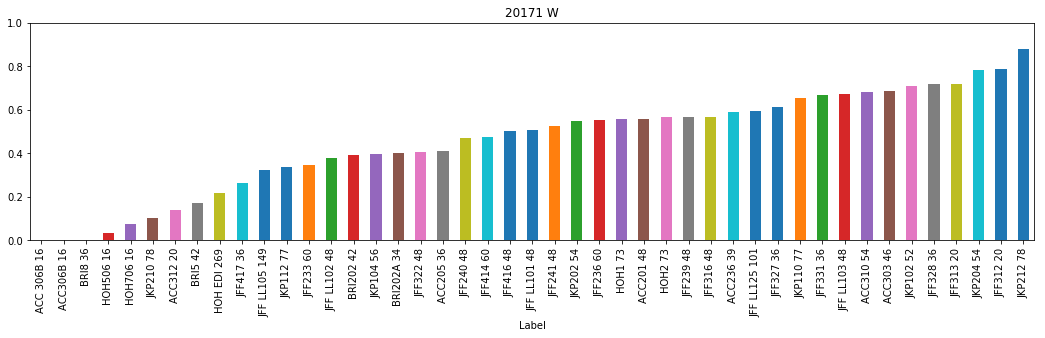

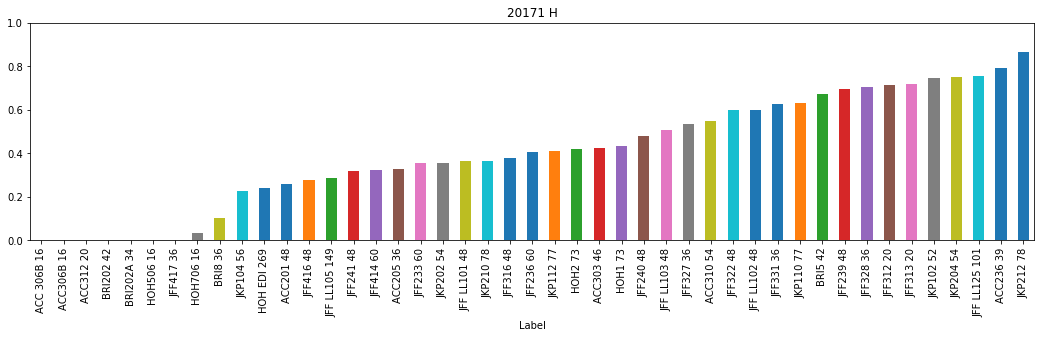

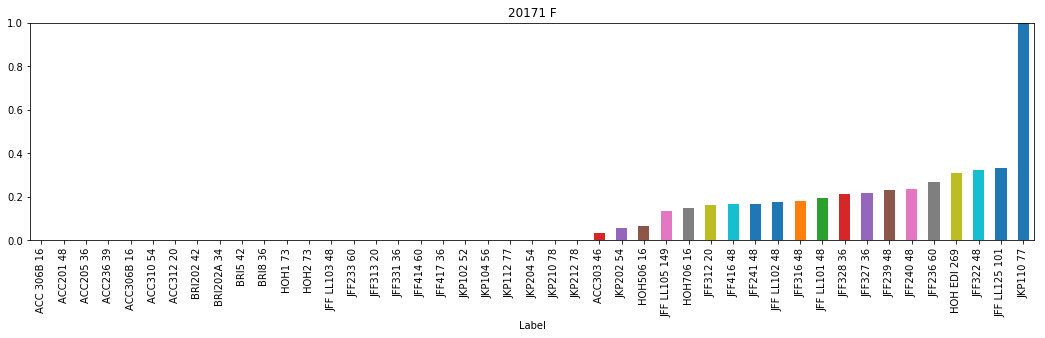

In [141]:
# Sorting by Prime Time Utilization of Rooms
output=pd.DataFrame(lines,columns=['Term','Room','Day','Utilization']).merge(capacities[['Room','Size']], on='Room')  # Merge room size data with the generated output above
output['Label']=output.Room.str.cat(output.Size.astype(str),sep=' ')

for term in [20163,20171]:
    for day in 'MTWHF':
        (output.query("Term==@term & Day==@day")
         .sort_values(['Utilization','Room'])
         .plot(x='Label',y='Utilization',by='Day',kind='bar',title='{0} {1}'.format(term,day),figsize=(18,4),ylim=(0,1),legend=False)
        )
plt.show()